In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('Housing.csv')


# Display basic info
print(data.info())
print(data.head())

# Convert categorical variables to numerical (yes/no to 1/0)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_cols] = data[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Convert furnishingstatus to dummy variables
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# Check for missing values
print(data.isnull().sum())


Saving Housing.csv to Housing (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4     

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000

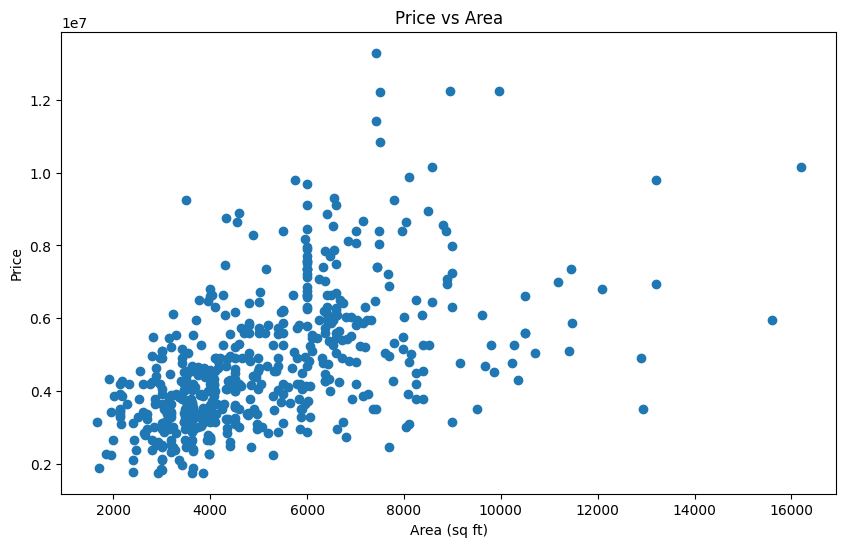

In [9]:
# Summary statistics
print(data.describe())

# Correlation matrix
corr_matrix = data.corr()
print(corr_matrix['price'].sort_values(ascending=False))

# Visualize relationships
plt.figure(figsize=(10,6))
plt.scatter(data['area'], data['price'])
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show()

Simple Linear Regression Results:
MAE: 1474748.1337969352
MSE: 3675286604768.185
RMSE: 1917103.7021424233
R²: 0.27287851871974644


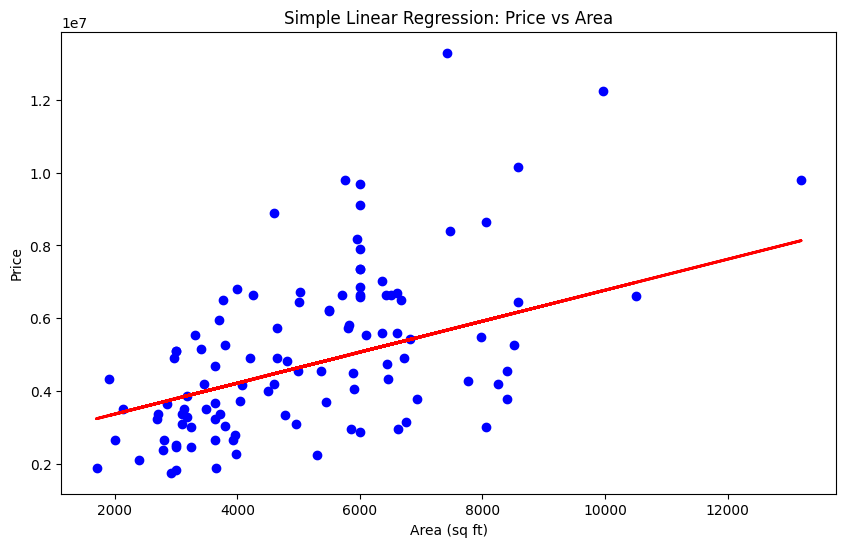


Coefficient (slope): 425.72984193878284
Interpretation: For each additional square foot of area, the price increases by 425.72984193878284 units


In [10]:
# Prepare data
X = data[['area']]
y = data['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Make predictions
y_pred = simple_model.predict(X_test)

# Evaluate
print("Simple Linear Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R²: {r2_score(y_test, y_pred)}")

# Plot regression line
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Simple Linear Regression: Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show()

# Coefficient interpretation
print(f"\nCoefficient (slope): {simple_model.coef_[0]}")
print("Interpretation: For each additional square foot of area, the price increases by", simple_model.coef_[0], "units")

In [11]:
# Prepare data (using all features)
X = data.drop('price', axis=1)
y = data['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Make predictions
y_pred = multi_model.predict(X_test)

# Evaluate
print("\nMultiple Linear Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R²: {r2_score(y_test, y_pred)}")

# Feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': multi_model.coef_
})
print("\nFeature Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))


Multiple Linear Regression Results:
MAE: 970043.4039201637
MSE: 1754318687330.6633
RMSE: 1324506.9600914384
R²: 0.6529242642153185

Feature Coefficients:
                            Feature   Coefficient
2                         bathrooms  1.094445e+06
8                   airconditioning  7.914267e+05
7                   hotwaterheating  6.846499e+05
10                         prefarea  6.298906e+05
3                           stories  4.074766e+05
6                          basement  3.902512e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
9                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
